# Environment setup

In [1]:
from sys import platform
from analysis_utils import *

In [2]:
MERGED_FIF_PATH = os.path.join('..', '3-find-blinks', '3.2-manually-select-blinker-blinks', 'merged-fif')

For exporting figures:

In [3]:
FIGURES_PATH = os.path.join('..', 'figures')

In [4]:
subjects = [
    1, 
    #2, # too few blinks?
    3, 4, 
    #5, # too few blinks?
    6, 7, 8,
]

In [5]:
event_dict = {
    "Listening/chor-038": 1,
    "Listening/chor-096": 2,
    "Listening/chor-101": 3,
    "Listening/chor-019": 4,
    "Imagery/chor-038": 11,
    "Imagery/chor-096": 12,
    "Imagery/chor-101": 13,
    "Imagery/chor-019": 14,
}

In [6]:
%matplotlib widget

# Load Victor-Purpura Distance Metric Results

sub1: listening: (32, 40.9%)
sub1: imagery: (32, 56.8%)
sub3: listening: (32, 43.2%)
sub3: imagery: (1.2, 43.2%)
sub4: listening: (32, 47.7%)
sub4: imagery: (32, 29.5%)
sub6: listening: (32, 38.6%)
sub6: imagery: (32, 45.5%)
sub7: listening: (32, 47.7%)
sub7: imagery: (32, 45.5%)
sub8: listening: (32, 36.4%)
sub8: imagery: (32, 40.9%)


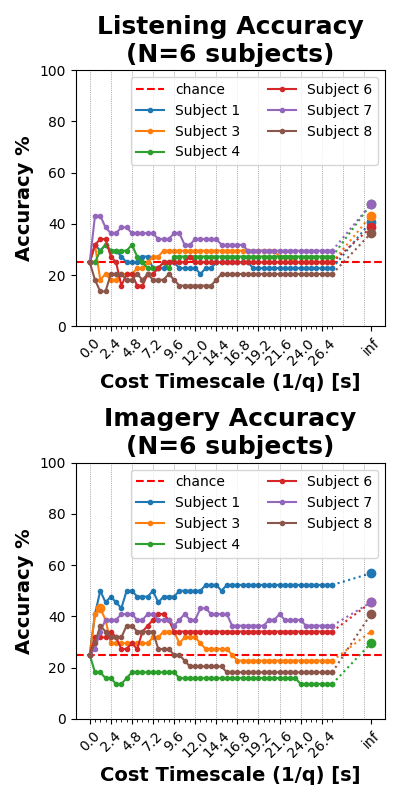

In [7]:
def plot_results_all(
    subjects, event_dict, tau_max_s = 10, npy_filename = '',
    INF_X_POS = 30, # where to plot infty
    MAX_TEXT = False,
):

    fig, ax = plt.subplots(2, 1, figsize=(4,8))
    ax[0].axhline(y=1/4*100, c='r', label='chance', ls='--')
    ax[1].axhline(y=1/4*100, c='r', label='chance', ls='--')
    
    for SUBJECT in subjects: 
        results_listen = np.load(f'npy/sub{SUBJECT}_results_listen{npy_filename}.npy', allow_pickle=True).flat[0]
        results_imagery = np.load(f'npy/sub{SUBJECT}_results_imagery{npy_filename}.npy', allow_pickle=True).flat[0]
    
        if tau_max_s:
            tau_list = [t for t in results_imagery.keys() if t <= tau_max_s]
        else: # plot all timescales
            tau_list = [t for t in results_imagery.keys()]
        inf_idx = np.where(np.isinf(tau_list))[0]
        #print(inf_idx)

        # plot infty as 30
        tau_list_xticks = [INF_X_POS if np.isinf(tau) else tau for tau in tau_list]
        tau_list_xticklabels = ['inf' if np.isinf(tau) else round(tau,2) for tau in tau_list]
        #print(tau_list_xlabels)

        acc_listen = [results_listen[tau]['acc'] for tau in tau_list]
        max_listen = np.max(acc_listen)
        tau_max_listen = tau_list[np.argmax(acc_listen)]
        if tau_max_listen == np.inf:
            tau_max_listen = INF_X_POS

        acc_imagery = [results_imagery[tau]['acc'] for tau in tau_list]
        max_imagery = np.max(acc_imagery)
        tau_max_imagery = tau_list[np.argmax(acc_imagery)]
        if tau_max_imagery == np.inf:
            tau_max_imagery = INF_X_POS

        # Solid line to connect all q beats
        line_listen, = ax[0].plot(tau_list_xticks[:-1], acc_listen[:-1], '.-', label=f'Subject {SUBJECT}')
        line_imagery, = ax[1].plot(tau_list_xticks[:-1], acc_imagery[:-1], '.-', label=f'Subject {SUBJECT}')

        # Dotted line to connect to q inf
        ax[0].plot(tau_list_xticks[-2:], acc_listen[-2:], '.:', c=line_listen.get_color())
        ax[1].plot(tau_list_xticks[-2:], acc_imagery[-2:], '.:', c=line_imagery.get_color())

        # identify the subject's max accuracy
        #ax[0].axvline(x=tau_max_listen, lw=1, c=line_listen.get_color(), ls='-', alpha=0.5)
        #ax[1].axvline(x=tau_max_imagery, lw=1, c=line_imagery.get_color(), ls='-', alpha=0.5)
        ax[0].plot(tau_max_listen, max_listen, c=line_listen.get_color(), marker='o', ms=6)

        if MAX_TEXT:
            ax[0].text(
                tau_max_listen+1, max_listen, f'{max_listen:.0f}%', 
                c=line_listen.get_color(), 
                fontsize=8, 
                bbox=dict(
                    fill=True, 
                    facecolor='white', 
                    linewidth=0.1, 
                    alpha=0.75,
                ),
            )
        else:
            print(f'sub{SUBJECT}: listening: ({tau_max_listen}, {round(max_listen,1)}%)')

        # big marker identify the subject's max accuracy
        ax[1].plot(tau_max_imagery, max_imagery, c=line_imagery.get_color(), marker='o', ms=6)

        if MAX_TEXT:
            ax[1].text(
                tau_max_imagery+1, max_imagery, 
                f'{max_imagery:.0f}%', 
                c=line_imagery.get_color(), fontsize=8, bbox=dict(fill=True, facecolor='white', linewidth=0.1, alpha=0.5),
            )
            #plt.text(x, y, s, bbox=dict(fill=False, edgecolor='red', linewidth=2))
        else:
            print(f'sub{SUBJECT}: imagery: ({tau_max_imagery}, {round(max_imagery, 1)}%)')

        xticks = tau_list_xticks[::4]
        xticks.extend(tau_list_xticks[-1:])
        xticklabels = tau_list_xticklabels[::4]
        xticklabels.extend(tau_list_xticklabels[-1:])
        for n in range(2):
            if tau_max_s:
                for n_bars in range(int(tau_max_s/2.4)+1):
                    ax[n].axvline(x=0.6*4*n_bars, lw=.5, c='k', ls=':', alpha=0.1)
            else: # assume max piece length is 13bars
                for n_bars in range(13+1):
                    ax[n].axvline(x=0.6*4*n_bars, lw=.5, c='k', ls=':', alpha=0.1)

            ax[n].legend(loc='upper right', ncol=2)
            ax[n].set_xlabel('Cost Timescale (1/q) [s]',  fontsize=14, fontweight='bold')
            ax[n].set_ylabel('Accuracy %',  fontsize=14, fontweight='bold')

            ax[n].set_ylim([0, 100])

            # tick for every beat
            ax[n].set_xticks(tau_list_xticks[:-1], minor=True)

            # labelled tick for every downbeat
            ax[n].set_xticks(xticks)
            ax[n].set_xticklabels(xticklabels, rotation=45)
            #ax[n].set_xlim([0, tau_max_s])
            
        ax[0].set_title('Listening Accuracy\n(N=6 subjects)',  fontsize=18, fontweight='bold')
        ax[1].set_title('Imagery Accuracy\n(N=6 subjects)',  fontsize=18, fontweight='bold')
        #plt.suptitle(f'Subject {subjects}: argmin(distance(1 test train, 43 ref trains))')
        #print(f'Subject {subjects}: argmin(distance(1 test train, 43 ref trains))')

        if 0:
            ax[1].remove()
            ax_cm_listen = fig.add_subplot(2, 2, 3)

            plot_confusion_matrix(
                results_listen[tau_max_listen]['cm'],
                results_listen[tau_max_listen]['cm_labels'],
                event_dict,
                ax = ax_cm_listen,
                title = f'Listening Trials\nConfusion Matrix\nq={round(1/tau_max_listen, 2)}Hz, 1/q=' + f'{tau_max_listen}s'
            )

            ax_cm_imagery = fig.add_subplot(2, 2, 4)

            plot_confusion_matrix(
                results_imagery[tau_max_imagery]['cm'],
                results_imagery[tau_max_imagery]['cm_labels'],
                event_dict,
                ax = ax_cm_imagery,
                title = f'Imagery Trials\nConfusion Matrix\nq={round(1/tau_max_imagery, 2)}Hz, 1/q=' + f'{tau_max_imagery}s'
            )

    plt.tight_layout()
    plt.show()

plot_results_all(
    subjects, event_dict, 
    tau_max_s=None, #2.4*2, 
    npy_filename = '_taus-48', # '',
    INF_X_POS = 32,
)
plt.savefig(os.path.join(FIGURES_PATH, "all_sub_acc.svg"), transparent=True)#, dpi=600)

AUC

In [8]:
npy_filename = '_taus-48'
for SUBJECT in subjects[0:1]: 
    results_listen = np.load(f'npy/sub{SUBJECT}_results_listen{npy_filename}.npy', allow_pickle=True).flat[0]
    results_imagery = np.load(f'npy/sub{SUBJECT}_results_imagery{npy_filename}.npy', allow_pickle=True).flat[0]

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

for SUBJECT in subjects:
    for condition in ['listen', 'imagery']:
        
        results = np.load(f'npy/sub{SUBJECT}_results_{condition}{npy_filename}.npy', allow_pickle=True).flat[0]
        
        q_best = ''
        auc_best = 0.5

        for q in results:
            y_true = results[q]['y_true']
            y_pred = results[q]['y_pred']

            label_binarizer = LabelBinarizer().fit(y_true)
            auc = roc_auc_score(
                y_true=label_binarizer.transform(y_true), 
                y_score=label_binarizer.transform(y_pred),  
                multi_class='ovr',
            ) #, pos_label=4, average=None)

            if auc > auc_best:
                q_best = q
                auc_best = auc
                acc_best = results[q]['acc']

        print(f'sub{SUBJECT}, {condition}, {q_best:0.2f}, {auc_best:0.2f}, {acc_best:0.2f}%')

sub1, listen, inf, 0.61, 40.91%
sub1, imagery, inf, 0.71, 56.82%
sub3, listen, inf, 0.62, 43.18%
sub3, imagery, 1.20, 0.62, 43.18%
sub4, listen, inf, 0.65, 47.73%
sub4, imagery, inf, 0.53, 29.55%
sub6, listen, inf, 0.59, 38.64%
sub6, imagery, inf, 0.64, 45.45%
sub7, listen, inf, 0.65, 47.73%
sub7, imagery, inf, 0.64, 45.45%
sub8, listen, inf, 0.58, 36.36%
sub8, imagery, inf, 0.61, 40.91%


In [10]:
def plot_info(results_matrix, ax, rowLabels, colLabels, title= "", vmin = None, vmax=None, fontsize=4, cmap='magma'):
    # https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    # fig, ax = plt.subplots(figsize = figsize)
    #im = ax.imshow(results_matrix, cmap=cmap, interpolation=None, vmin=vmin, vmax=vmax)
    
    # Show all ticks and label them with the respective list entries
    #ax.set_xticks(np.arange(len(colLabels)), labels=colLabels)
    #ax.set_yticks(np.arange(len(rowLabels)), labels=rowLabels)

    sns.heatmap(
        results_matrix, 
        annot=False,
        #fmt='', 
        cmap='YlGnBu', 
        xticklabels=rowLabels,
        yticklabels=colLabels,
        square = True,
        ax = ax,
    )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
            rotation_mode="anchor", fontsize=fontsize)
    '''
    # Loop over data dimensions and create text annotations.
    for i in range(N):
        for j in range(N):
            text = ax.text(j, i, results_matrix[i, j],
                        ha="center", va="center", color="w")
    '''

    for offset in range(0, results_matrix.shape[0], 11):
        ax.axvline(x = offset-0.5, c='w')
        ax.axhline(y = offset-0.5, c='w')

    ax.set_title(title)
    #plt.colorbar(im) #, ax=ax)
    #plt.tight_layout()
    #plt.show()

In [11]:
def plot_results(
    subjectID, event_dict, 
    results_listen, results_imagery, 
    tau_max_s=None,
    show_listening_xticklabels = True,
    show_listening_yticklabels = True,
    show_imagery_xticklabels = True,
    show_imagery_yticklabels = True,
    cm_listening_xlabel = 'Actual',
    cm_listening_ylabel = 'Prediction',
    cm_imagery_xlabel = 'Actual',
    cm_imagery_ylabel = 'Prediction',
    PLOT_ALL_Q = False,
    PLOT_ALL_CONFUSION_MATRIX = False,
):

    tau_list = list(results_imagery.keys())
    if tau_max_s:
        tau_list = [t for t in results_imagery.keys() if t <= tau_max_s]
    else: # plot all timescales
        tau_list = [t for t in results_imagery.keys()]
    #tau_list_2bars = [tau for tau in tau_list if tau<max_tau]
    
    acc_listen = [results_listen[tau]['acc'] for tau in tau_list]
    max_listen = np.max(acc_listen)
    tau_max_listen = tau_list[np.argmax(acc_listen)]

    acc_imagery = [results_imagery[tau]['acc'] for tau in tau_list]
    max_imagery = np.max(acc_imagery)
    tau_max_imagery = tau_list[np.argmax(acc_imagery)]

    print(f'sub{subjectID}')
    print(f'listen acc: {max_listen:0.2f}% for 1/q={tau_max_listen:0.2f} s')
    print(f'imagin acc: {max_imagery:0.2f}% for 1/q={tau_max_imagery:0.2f} s')
    
    if PLOT_ALL_Q:
        fig, ax = plt.subplots(1, 1, figsize=(3,4))

        line_listen, = ax.plot(tau_list, acc_listen, '.-', label='Listen')
        line_imagery, = ax.plot(tau_list, acc_imagery, '.-', label='Imagery')

        ax.axvline(x=tau_max_listen, lw=1, c=line_listen.get_color(), ls='-')
        ax.axvline(x=tau_max_imagery, lw=1, c=line_imagery.get_color(), ls='-')

        ax.axhline(y=1/4*100, c='r', label='chance', ls='-')
        for n_bars in range(12):
            ax.axvline(x=0.6*4*n_bars, lw=1, c='k', ls=':')


        ax.legend(loc='upper right')
        ax.set_xlabel('Timescale (= 1/q) [s]')
        ax.set_ylabel('Accuracy %')

        ax.set_title(f'Subject {subjectID}', fontsize=18, fontweight='bold')#: argmin(distance(1 test train, 43 ref trains))')
        ax.set_ylim([0, 100])

        ax.plot(tau_max_listen, max_listen, c=line_listen.get_color(), marker='o', ms=6)
        ax.text(
            tau_max_listen-0.3, max_listen+2, f'{max_listen:.0f}%', 
            c=line_listen.get_color(), fontsize=8, bbox=dict(fill=True, facecolor='white', linewidth=0.1, alpha=0.5),
        )
        ax.plot(tau_max_imagery, max_imagery, c=line_imagery.get_color(), marker='o', ms=6)
        ax.text(
            tau_max_imagery-0.3, max_imagery+2, f'{max_imagery:.0f}%', 
            c=line_imagery.get_color(), fontsize=8, bbox=dict(fill=True, facecolor='white', linewidth=0.1, alpha=0.5),
        )
        plt.tight_layout()
        plt.show()

    fig2, ax2 = plt.subplots(1, 2, figsize=(5,5))
    #ax[1].remove()
    ax_cm_listen = ax2[0] #fig.add_subplot(2, 2, 3)

    title = ''
    title += f'Subject {SUBJECT}: Listening\n'
    #title += 'Confusion Matrix\n'
    #title += '$q_{best}=$' + f'{round(1/tau_max_listen, 2)} Hz' 
    #title += ', '
    title += '$1/q_{best}=$' + f'{tau_max_listen:.02f}' +'$\,s$'
    plot_confusion_matrix(
        results_listen[tau_max_listen]['cm'],
        results_listen[tau_max_listen]['cm_labels'],
        event_dict,
        ax = ax_cm_listen,
        show_xticklabels = show_listening_xticklabels, 
        show_yticklabels = show_listening_yticklabels, 
        title = title,
        xlabel = cm_listening_xlabel, #'Actual',
        ylabel = cm_listening_ylabel, #'Prediction',
        vlim=[0, 11], 
        cbar=False,
    )

    ax_cm_imagery = ax2[1] #fig.add_subplot(2, 2, 4)
    title = ''
    title = f'Subject {SUBJECT}: ' + 'Imagery\n'
    #title += 'Confusion Matrix\n'
    #title += '$q_{best}=$' + f'{round(1/tau_max_imagery, 2)} Hz'
    #title += ', '
    title += '$1/q_{best}=$' + f'{tau_max_imagery:.02f}' +'$\,s$'
    plot_confusion_matrix(
        results_imagery[tau_max_imagery]['cm'],
        results_imagery[tau_max_imagery]['cm_labels'],
        event_dict,
        ax = ax_cm_imagery,
        show_xticklabels = show_imagery_xticklabels, 
        show_yticklabels = show_imagery_yticklabels, 
        title = title,
        xlabel = cm_imagery_xlabel, #'Actual',
        ylabel = cm_imagery_ylabel, #'Prediction',
        vlim=[0, 11], 
        cbar=False,
    )

    plt.tight_layout()
    plt.show()
    fig2.savefig(os.path.join(FIGURES_PATH, f'sub-{SUBJECT}_qbest.svg'), transparent=True)

    if PLOT_ALL_CONFUSION_MATRIX:
        fig, ax = plt.subplots(2, 2, figsize=(8,8))
        plot_info(results_listen[0]['vp'], ax=ax[0][0], rowLabels=range(44), colLabels=range(44))
        ax[0][0].set_title(f'Listening Trials\nq=Inf Hz, 1/q=0s')
        plot_info(results_listen[tau_max_listen]['vp'], ax=ax[0][1], rowLabels=range(44), colLabels=range(44))
        ax[0][1].set_title(f'Listening Trials\nq={round(1/tau_max_listen, 2)}Hz, 1/q=' + f'{tau_max_listen:.02f}s')

        plot_info(results_imagery[0]['vp'], ax=ax[1][0], rowLabels=range(44), colLabels=range(44))
        ax[1][0].set_title(f'Imagery Trials\nq=Inf Hz, 1/q=0s')
        plot_info(results_imagery[tau_max_imagery]['vp'], ax=ax[1][1], rowLabels=range(44), colLabels=range(44))
        ax[1][1].set_title(f'Imagery Trials\nq={round(1/tau_max_imagery, 2)}Hz, 1/q=' + f'{tau_max_imagery:.02f}s')

        #plt.tight_layout()
        plt.show()

<>:79: SyntaxWarning: invalid escape sequence '\,'
<>:100: SyntaxWarning: invalid escape sequence '\,'
<>:79: SyntaxWarning: invalid escape sequence '\,'
<>:100: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_2650839/3430619445.py:79: SyntaxWarning: invalid escape sequence '\,'
  title += '$1/q_{best}=$' + f'{tau_max_listen:.02f}' +'$\,s$'
/tmp/ipykernel_2650839/3430619445.py:100: SyntaxWarning: invalid escape sequence '\,'
  title += '$1/q_{best}=$' + f'{tau_max_imagery:.02f}' +'$\,s$'


sub1
listen acc: 40.91% for 1/q=inf s
imagin acc: 56.82% for 1/q=inf s


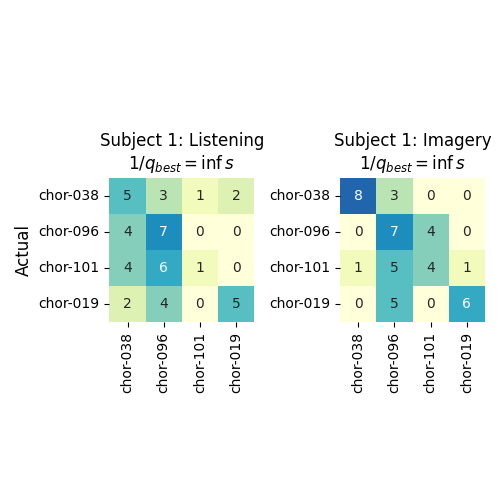

sub3
listen acc: 43.18% for 1/q=inf s
imagin acc: 43.18% for 1/q=1.20 s


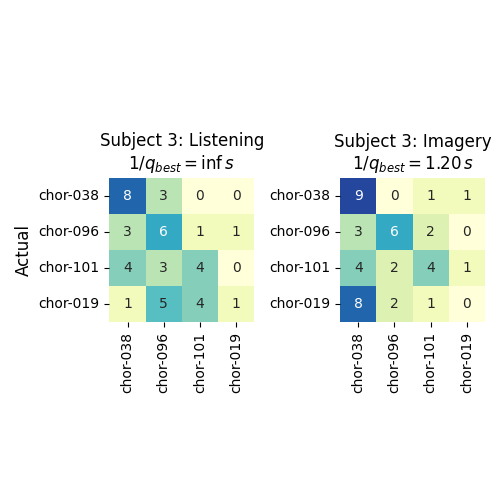

sub4
listen acc: 47.73% for 1/q=inf s
imagin acc: 29.55% for 1/q=inf s


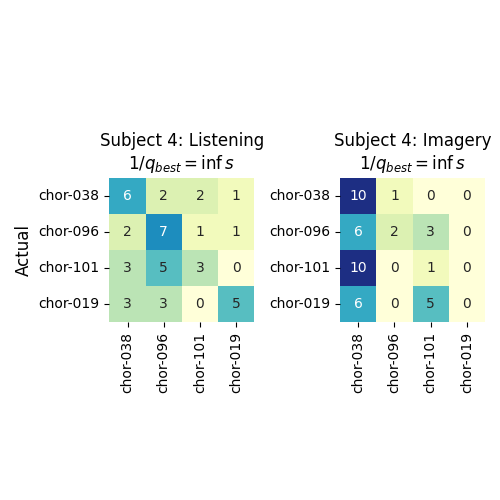

sub6
listen acc: 38.64% for 1/q=inf s
imagin acc: 45.45% for 1/q=inf s


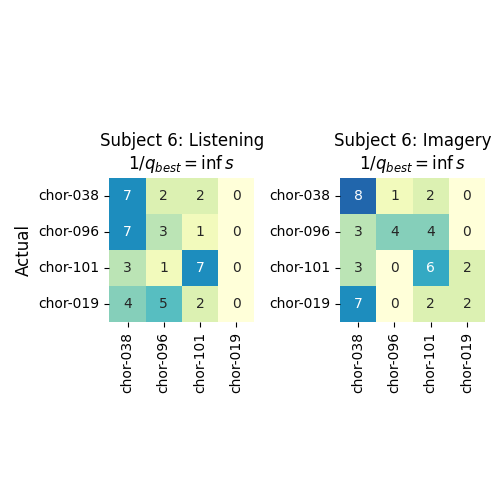

sub7
listen acc: 47.73% for 1/q=inf s
imagin acc: 45.45% for 1/q=inf s


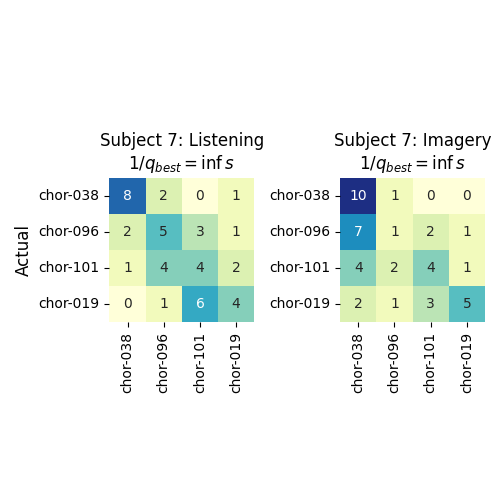

sub8
listen acc: 36.36% for 1/q=inf s
imagin acc: 40.91% for 1/q=inf s


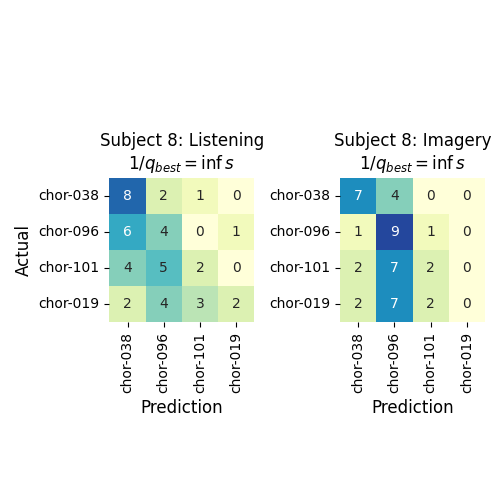

In [12]:
npy_filename = '_taus-48'

for SUBJECT in subjects: #RAWS_SUB:
    results_listen = np.load(f'npy/sub{SUBJECT}_results_listen{npy_filename}.npy', allow_pickle=True).flat[0]
    results_imagery = np.load(f'npy/sub{SUBJECT}_results_imagery{npy_filename}.npy', allow_pickle=True).flat[0]

    if SUBJECT != subjects[-1]:
        show_listening_xticklabels = False, 
        show_listening_yticklabels = False, #True, 
        show_imagery_xticklabels = False, 
        show_imagery_yticklabels = False, 
        cm_listening_xlabel = ''
        cm_listening_ylabel = 'Actual'
        cm_imagery_xlabel = ''
        cm_imagery_ylabel = ''
    else:
        show_listening_xticklabels = False, #True, 
        show_listening_yticklabels = False, #True, 
        show_imagery_xticklabels = False, #True, 
        show_imagery_yticklabels = False, 
        cm_listening_xlabel = 'Prediction' 
        cm_listening_ylabel = 'Actual'
        cm_imagery_xlabel = 'Prediction'
        cm_imagery_ylabel = ''

    plot_results(
        SUBJECT, event_dict, results_listen, results_imagery,
        show_listening_xticklabels = show_listening_xticklabels, 
        show_listening_yticklabels = show_listening_yticklabels, 
        show_imagery_xticklabels = show_imagery_xticklabels, 
        show_imagery_yticklabels = show_imagery_yticklabels, 
        cm_listening_xlabel = cm_listening_xlabel, 
        cm_listening_ylabel = cm_listening_ylabel, 
        cm_imagery_xlabel = cm_imagery_xlabel,
        cm_imagery_ylabel = cm_imagery_ylabel,
    )